In [1]:
from predictions.etl import ETL
from predictions.evaluate import Evaluate
from predictions.predict import Predict 

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
def build_model(intput_shape):
    model = Sequential()
    
    model.add(LSTM(128, return_sequences=True, input_shape=intput_shape))
    model.add(LSTM(128))
    model.add(Dense(1))
    
    return model

In [3]:
etl = ETL("../data/timeseries/2015/merged.csv", features=['PriceUSD'])

In [6]:
model = build_model(etl.test_x.shape[1:])
model.compile(optimizer='adam', loss='mean_absolute_error')
model.fit(etl.train_x,
            etl.train_y,
            epochs=100,
            batch_size=32,
            validation_split=0.2,
            shuffle=False
        )

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.2417 - val_loss: 0.1601
Epoch 2/100
1/1 [==============================] - 0s 63ms/step - loss: 0.1955 - val_loss: 0.1166
Epoch 3/100
1/1 [==============================] - 0s 66ms/step - loss: 0.1468 - val_loss: 0.0683
Epoch 4/100
1/1 [==============================] - 0s 60ms/step - loss: 0.0957 - val_loss: 0.0204
Epoch 5/100
1/1 [==============================] - 0s 88ms/step - loss: 0.0439 - val_loss: 0.0529
Epoch 6/100
1/1 [==============================] - 0s 84ms/step - loss: 0.0471 - val_loss: 0.0820
Epoch 7/100
1/1 [==============================] - 0s 87ms/step - loss: 0.0758 - val_loss: 0.0803
Epoch 8/100
1/1 [==============================] - 0s 68ms/step - loss: 0.0742 - val_loss: 0.0607
Epoch 9/100
1/1 [==============================] - 0s 78ms/step - loss: 0.0549 - val_loss: 0.0344
Epoch 10/100
1/1 [==============================] - 0s 68ms/step - loss: 0.0367 - val_loss: 0.0164
Epoch 11/100
1/1 [===

In [11]:
predict = Predict(model, etl.test_x, etl.test_y)
evaluate = Evaluate(etl.inverse_scale(etl.test_y), etl.inverse_scale(predict.predictions))

1/1 [==============================] - 0s 35ms/step


In [12]:
evaluate.print()

| Metric         |       Value |
|----------------|-------------|
| MSE            | 637.586     |
| RMSE           |  25.2505    |
| MAE            |  19.3574    |
| R2             |   0.730268  |
| MAPE           |   0.0512398 |
| Variance Ratio |   0.320639  |


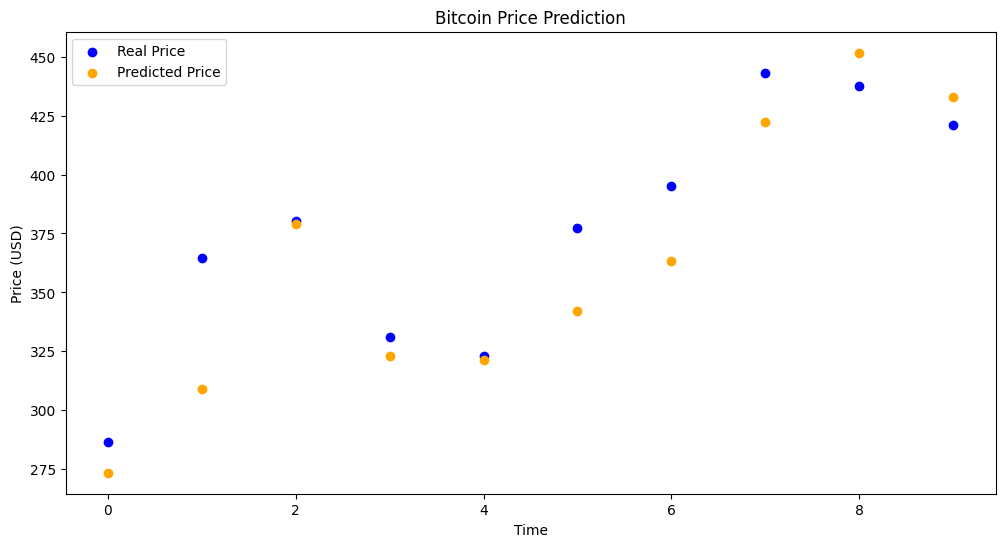

In [13]:
evaluate.plot()